In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Bio.Seq import Seq


In [2]:
def read_sam(filename):
    header_count = 0
    with open(filename, 'r') as f:
        for line in f:
            if line[0] == '@':
                header_count += 1
            else:
                break
    df = pd.read_csv(filename, skiprows=header_count, header=None, sep='\t')
    return df

In [39]:
def get_count(reads, orf_num, pro_len):
    aa_trans = dict(zip('ACDEFGHIKLMNPQRSTVWYX*', range(22)))
    def add_count(count_matrix, pos, orf_num, seq):
        trim = (3 - pos % 3 + orf_num) % 3
        begin = int(((pos + trim) - orf_num) / 3)
        pro_seq = Seq(seq[trim:]).translate()
        for idx, ch in enumerate(pro_seq):
            count_matrix[begin + idx, aa_trans[ch]] += 1
    count_matrix = np.zeros([pro_len, 22])
    reads.apply(lambda x: add_count(count_matrix, x[3] - 1, orf_num, x[9]), axis=1)
    return count_matrix
    
        

In [4]:
df = read_sam('I1.sam')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,M02850:84:000000000-C8GDW:1:1101:16977:1401,0,Nb23,42,42,142M,*,0,0,GGAAGAAGGTGTTCAATTGGACAAGAGAGAAGCTAGCGCACAGGTG...,FFFGGGGGGGGGGHHHHHHHHHHHHHHHGGHHHGHHHGGGGGHHHE...,AS:i:0,XN:i:0,XM:i:0,XO:i:0,XG:i:0,NM:i:0,MD:Z:142,YT:Z:UU
1,M02850:84:000000000-C8GDW:1:1101:16977:1401,16,Nb23,305,42,142M,*,0,0,AAAACACCGTGTATCTGCAGATGAACAGCCTGAAACCGGAAGATAC...,HHE<<<GGHHHEHGFFHGHHHGHHHHHHFHHHGGDGGHHHHHGEDG...,AS:i:-10,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:90A1G49,YT:Z:UU
2,M02850:84:000000000-C8GDW:1:1101:14834:1405,0,Nb23,42,42,14M1D128M,*,0,0,GGAAGAAGGTGTTCATTGGACAAGAGAGAAGCTAGCGCACAGGTGC...,FFFGGGGGGFGGEHHFHHHHHHHHGHHGGHHHHHHHGGGGGHHFHH...,AS:i:-8,XN:i:0,XM:i:0,XO:i:1,XG:i:1,NM:i:1,MD:Z:14^A128,YT:Z:UU
3,M02850:84:000000000-C8GDW:1:1101:14834:1405,16,Nb23,329,42,142M,*,0,0,ACAGCCTGAAACCGGAAGATACCGCGGTGTATTATTGCGCGGTTCA...,HHHHHFHHGFAGFHHHHHGFEGGGGHHFHHHGHGGGGGGGHHHHHG...,AS:i:-10,XN:i:0,XM:i:2,XO:i:0,XG:i:0,NM:i:2,MD:Z:66A1G73,YT:Z:UU
4,M02850:84:000000000-C8GDW:1:1101:15083:1466,0,Nb23,42,42,142M,*,0,0,GGAAGAAGGTGTTCAATTGGACAAGAGAGAAGCTAGCGCACAGGTG...,FFFGGGGGGBEGEHHHHHFHHCFAFFHHGGHHHHHHHGGGGGHHAG...,AS:i:0,XN:i:0,XM:i:0,XO:i:0,XG:i:0,NM:i:0,MD:Z:142,YT:Z:UU


In [42]:
df = read_sam('I1.sam')
count_df = df[df[5] == '142M']
I1_count = get_count(count_df, 0, 200)

/usr/local/lib/python3.7/site-packages/Bio/Seq.py:2576: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


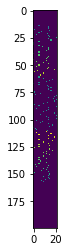

In [16]:
plt.imshow(I1_count)
plt.savefig('I1.png', dpi=800)

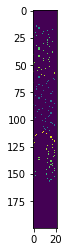

In [43]:
df = read_sam('I2.sam')
count_df = df[df[5] == '142M']
I2_count = get_count(count_df, 0, 200)
plt.imshow(I2_count)
plt.savefig('I2.png', dpi=800)

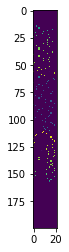

In [44]:
df = read_sam('E.sam')
count_df = df[df[5] == '142M']
E_count = get_count(count_df, 0, 200)
plt.imshow(E_count)
plt.savefig('E.png', dpi=800)

In [65]:
plot_I1 = np.array(I1_count[27:145, :20]) + 1
plot_I2 = np.array(I2_count[27:145, :20]) + 1
plot_E = np.array(E_count[27:145, :20]) + 1
plot_I1 /= np.dot(np.reshape(np.sum(plot_I1, axis=1), [118, 1]), np.ones([1, 20]))
plot_I2 /= np.dot(np.reshape(np.sum(plot_I2, axis=1), [118, 1]), np.ones([1, 20]))
plot_E /= np.dot(np.reshape(np.sum(plot_E, axis=1), [118, 1]), np.ones([1, 20]))


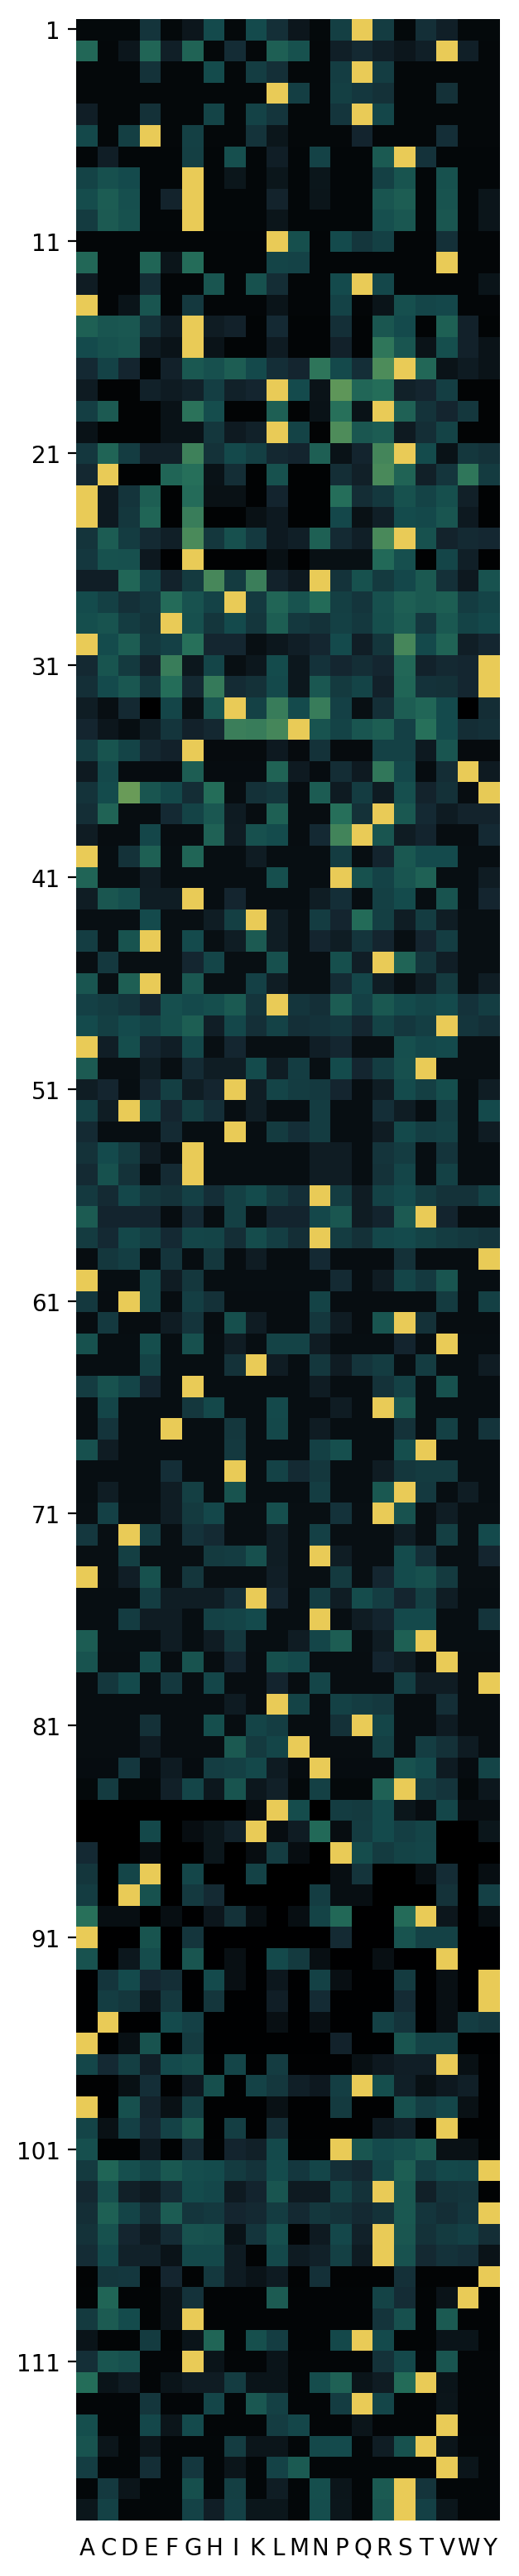

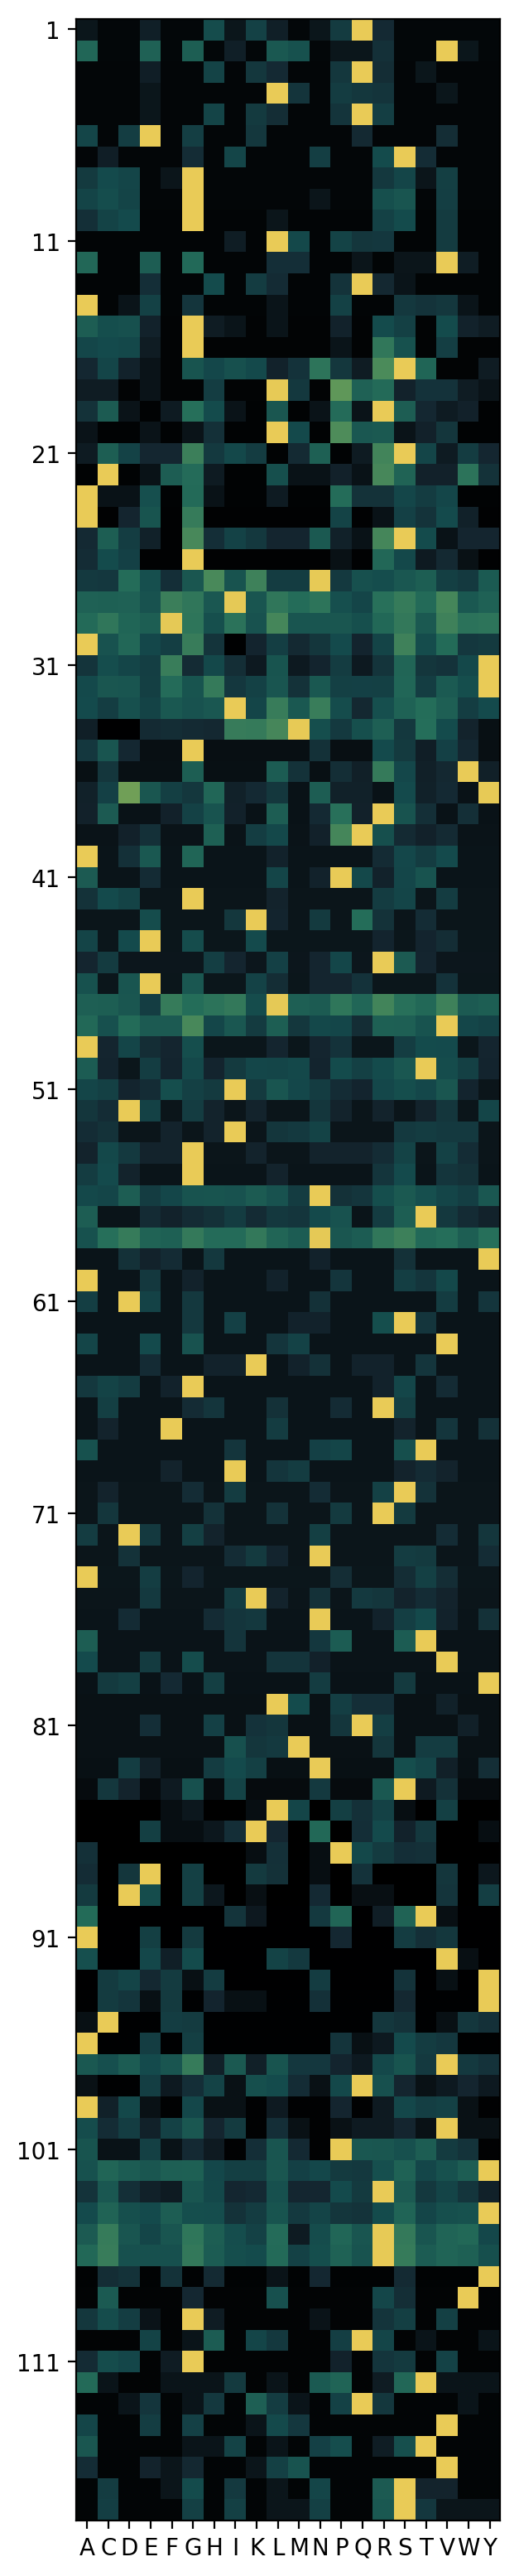

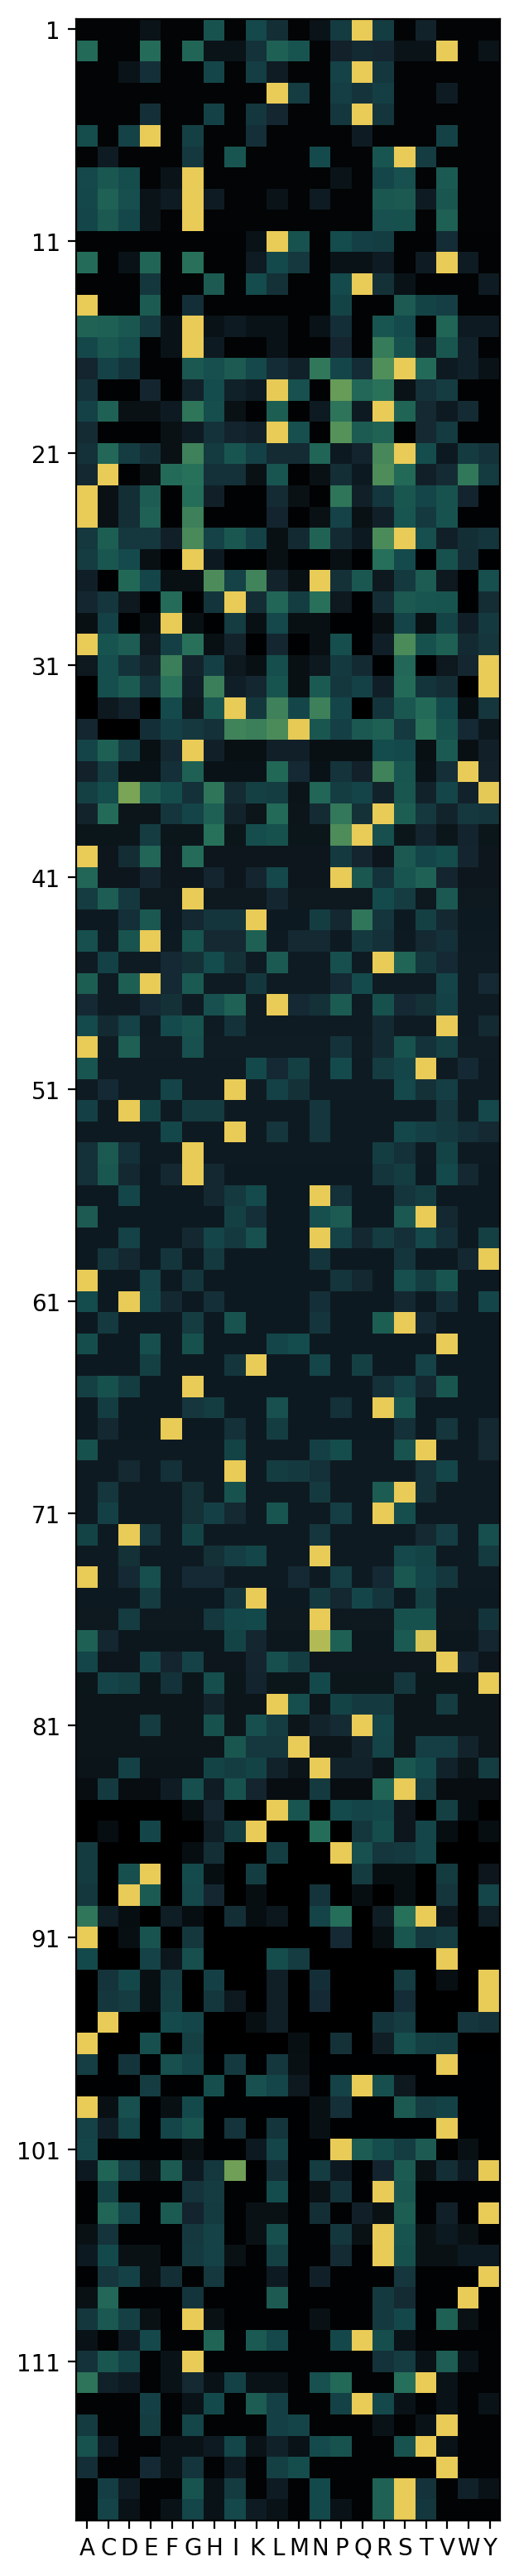

In [98]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
newmap = LinearSegmentedColormap.from_list('newmap', ['#000000', '#152731','#144A4C',
                                            '#256E5A','#55925A','#97B254','#E9CB57'],
                                          N=256)
fig = plt.figure(figsize=(4, 20), dpi=200)
plt.imshow(np.log(plot_I1), cmap=newmap, interpolation='nearest')
ax = plt.gca()
ax.set_yticks(np.arange(0, plot_I1.shape[0], 10))
ax.set_xticks(np.arange(plot_I1.shape[1]))
ax.set_yticklabels(np.arange(0, plot_I1.shape[0], 10) + 1)
ax.set_xticklabels(list('ACDEFGHIKLMNPQRSTVWY'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
#ax.get_xaxis().set_visible(False)
plt.savefig('I1l.png', dpi=200)
fig = plt.figure(figsize=(4, 20), dpi=200)
plt.imshow(np.log(plot_I2), cmap=newmap, interpolation='nearest')
ax = plt.gca()
ax.set_yticks(np.arange(0, plot_I1.shape[0], 10))
ax.set_xticks(np.arange(plot_I1.shape[1]))
ax.set_yticklabels(np.arange(0, plot_I1.shape[0], 10) + 1)
ax.set_xticklabels(list('ACDEFGHIKLMNPQRSTVWY'))
plt.savefig('I2l.png', dpi=200)
fig = plt.figure(figsize=(4, 20), dpi=200)
plt.imshow(np.log(plot_E), cmap=newmap, interpolation='nearest')
ax = plt.gca()
ax.set_yticks(np.arange(0, plot_I1.shape[0], 10))
ax.set_xticks(np.arange(plot_I1.shape[1]))
ax.set_yticklabels(np.arange(0, plot_I1.shape[0], 10) + 1)
ax.set_xticklabels(list('ACDEFGHIKLMNPQRSTVWY'))
plt.savefig('El.png', dpi=200)

In [83]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [100]:
colorbar = np.dot(np.flip(np.arange(256)).reshape([256, 1]), np.ones([1, 20]))
plt.imshow(colorbar, cmap=newmap)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('colorbar.png', dpi=200)